In [1]:
import pandas as pd
import sqlite3 as sql
import datetime as dt
import uuid
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr

1. score metrics

ERD
game_dim
game_reports
player_dim
game_rankings (game_uuid, player_id, rank)
current_scores_view

In [55]:
games_df = pd.read_csv('game_reports2.csv', parse_dates=[2,3])
games_df['players'] = games_df['players'].apply(lambda x: x.split(" "))
games_df['player_count'] = games_df['players'].apply(lambda x: len(x))
games_df['game_length'] = games_df['game_end'] - games_df['game_start']
games_df['game_length_minutes'] = games_df['game_length'].dt.total_seconds()/60

player_games_df = games_df.explode('players')
player_games_df['place'] = player_games_df.groupby(['game_played', 'game_start'])['players'].expanding().count().values

In [56]:
games_df['game_end'] - games_df['game_start']

0    0 days 02:20:00
1    0 days 01:30:00
2    0 days 01:27:00
3    0 days 01:42:00
4    0 days 00:49:00
5    0 days 02:53:00
6    0 days 00:36:00
7    0 days 01:07:00
8    0 days 01:05:00
9    0 days 01:50:00
10   0 days 01:30:00
11   0 days 00:12:00
12   0 days 00:24:00
13   0 days 00:16:00
14   0 days 00:30:00
15   0 days 01:03:00
16   0 days 00:40:00
17   0 days 00:31:00
18   0 days 01:15:00
19   0 days 01:01:00
dtype: timedelta64[ns]

In [57]:
player_games_df

,game_played,players,game_start,game_end,player_count,game_length,game_length_minutes,place
0,Sidereal_Confluence,Max,2023-12-10 09:10:00,2023-12-10 11:30:00,7,0 days 02:20:00,140.0,1.0
0,Sidereal_Confluence,Rachel,2023-12-10 09:10:00,2023-12-10 11:30:00,7,0 days 02:20:00,140.0,2.0
0,Sidereal_Confluence,Skylar,2023-12-10 09:10:00,2023-12-10 11:30:00,7,0 days 02:20:00,140.0,3.0
0,Sidereal_Confluence,Paul,2023-12-10 09:10:00,2023-12-10 11:30:00,7,0 days 02:20:00,140.0,4.0
0,Sidereal_Confluence,Karson,2023-12-10 09:10:00,2023-12-10 11:30:00,7,0 days 02:20:00,140.0,5.0
0,Sidereal_Confluence,Brenna,2023-12-10 09:10:00,2023-12-10 11:30:00,7,0 days 02:20:00,140.0,6.0
0,Sidereal_Confluence,John,2023-12-10 09:10:00,2023-12-10 11:30:00,7,0 days 02:20:00,140.0,7.0
1,Star_Realms,Toph,2023-12-10 09:55:00,2023-12-10 11:25:00,4,0 days 01:30:00,90.0,1.0
1,Star_Realms,Jules,2023-12-10 09:55:00,2023-12-10 11:25:00,4,0 days 01:30:00,90.0,2.0
1,Star_Realms,Lindsey,2023-12-10 09:55:00,2023-12-10 11:25:00,4,0 days 01:30:00,90.0,1.0


In [58]:
player_games_df.groupby(['game_played', 'game_start'], sort=False)['players'].expanding().count()

game_played          game_start             
Sidereal_Confluence  2023-12-10 09:10:00  0     1.0
                                          0     2.0
                                          0     3.0
                                          0     4.0
                                          0     5.0
                                          0     6.0
                                          0     7.0
Star_Realms          2023-12-10 09:55:00  1     1.0
                                          1     2.0
                                          1     3.0
                                          1     4.0
War_of_Whispers      2023-12-10 12:05:00  2     1.0
                                          2     2.0
                                          2     3.0
                                          2     4.0
Star_wars            2023-12-10 11:55:00  3     1.0
                                          3     2.0
7_wonders            2023-12-10 14:06:00  4     1.0
                   

In [61]:
player_games_df.groupby('players').sum('game_length_minutes')

,player_count,game_length_minutes,place,score
players,,,,
Brenna,17,361.0,15.0,202.0
Camilla,6,124.0,6.0,63.0
Dane,4,40.0,3.0,28.0
John,26,419.0,17.0,305.0
Jules,18,426.0,16.0,243.0
Karson,21,488.0,11.0,383.0
Les,20,283.0,17.0,163.0
Lindsey,13,255.0,11.0,158.0
Max,26,461.0,7.0,453.0


In [62]:
games_df = pd.read_csv('game_reports2.csv', parse_dates=[2,3])
games_df['players'] = games_df['players'].apply(lambda x: x.split(" "))
games_df['player_count'] = games_df['players'].apply(lambda x: len(x))
games_df['game_length'] = games_df['game_end'] - games_df['game_start']
games_df['game_length_minutes'] = games_df['game_length'].dt.total_seconds()/60

player_games_df = games_df.explode('players')
player_games_df['place'] = player_games_df.groupby(['game_played', 'game_start'], sort=False)['players'].expanding().count().values
#t * (1+((1-p)/(2n-2))) where t = time, p = place order, and n = # of players
t = player_games_df['game_length_minutes']
p = player_games_df['place']
n = player_games_df['player_count']
player_games_df['score'] = np.round(t * (1+((1-p)/(2*n-2))))
player_games_df


,game_played,players,game_start,game_end,player_count,game_length,game_length_minutes,place,score
0,Sidereal_Confluence,Max,2023-12-10 09:10:00,2023-12-10 11:30:00,7,0 days 02:20:00,140.0,1.0,140.0
0,Sidereal_Confluence,Rachel,2023-12-10 09:10:00,2023-12-10 11:30:00,7,0 days 02:20:00,140.0,2.0,128.0
0,Sidereal_Confluence,Skylar,2023-12-10 09:10:00,2023-12-10 11:30:00,7,0 days 02:20:00,140.0,3.0,117.0
0,Sidereal_Confluence,Paul,2023-12-10 09:10:00,2023-12-10 11:30:00,7,0 days 02:20:00,140.0,4.0,105.0
0,Sidereal_Confluence,Karson,2023-12-10 09:10:00,2023-12-10 11:30:00,7,0 days 02:20:00,140.0,5.0,93.0
0,Sidereal_Confluence,Brenna,2023-12-10 09:10:00,2023-12-10 11:30:00,7,0 days 02:20:00,140.0,6.0,82.0
0,Sidereal_Confluence,John,2023-12-10 09:10:00,2023-12-10 11:30:00,7,0 days 02:20:00,140.0,7.0,70.0
1,Star_Realms,Toph,2023-12-10 09:55:00,2023-12-10 11:25:00,4,0 days 01:30:00,90.0,1.0,90.0
1,Star_Realms,Jules,2023-12-10 09:55:00,2023-12-10 11:25:00,4,0 days 01:30:00,90.0,2.0,75.0
1,Star_Realms,Lindsey,2023-12-10 09:55:00,2023-12-10 11:25:00,4,0 days 01:30:00,90.0,3.0,60.0


<ipython-input-65-b60906187327>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax = player_games_df.groupby('players')['game_length_minutes','score'].sum().sort_values(by='score', ascending=False).plot(kind='scatter',x='game_length_minutes', y='score', figsize=(15, 8))


NameError: name 'x' is not defined

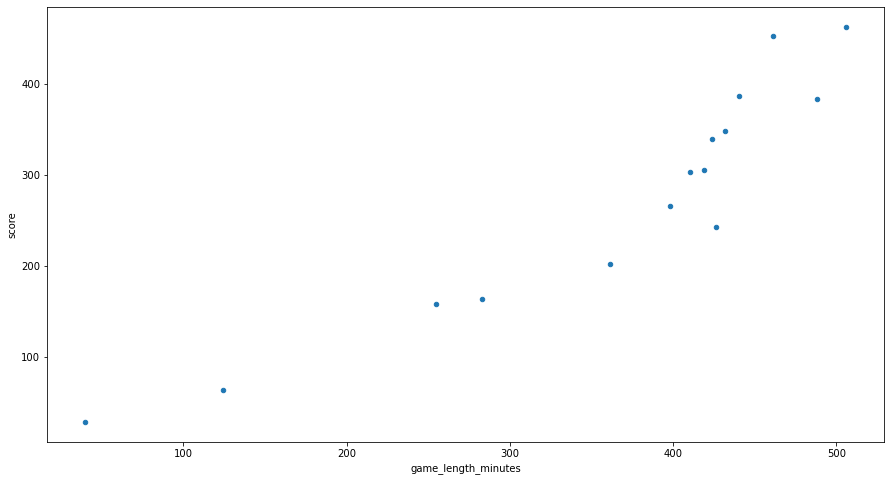

In [65]:
ax = player_games_df.groupby('players')['game_length_minutes','score'].sum().sort_values(by='score', ascending=False).plot(kind='scatter',x='game_length_minutes', y='score', figsize=(15, 8))
ax.plot(x,model.predict(x.reshape(-1,1)))

In [66]:
player_games_df.groupby('players')['score'].sum()

players
Brenna     202.0
Camilla     63.0
Dane        28.0
John       305.0
Jules      243.0
Karson     383.0
Les        163.0
Lindsey    158.0
Max        453.0
Paul       303.0
Preston    266.0
Rachel     463.0
Skylar     339.0
Toph       387.0
Zack       348.0
Name: score, dtype: float64

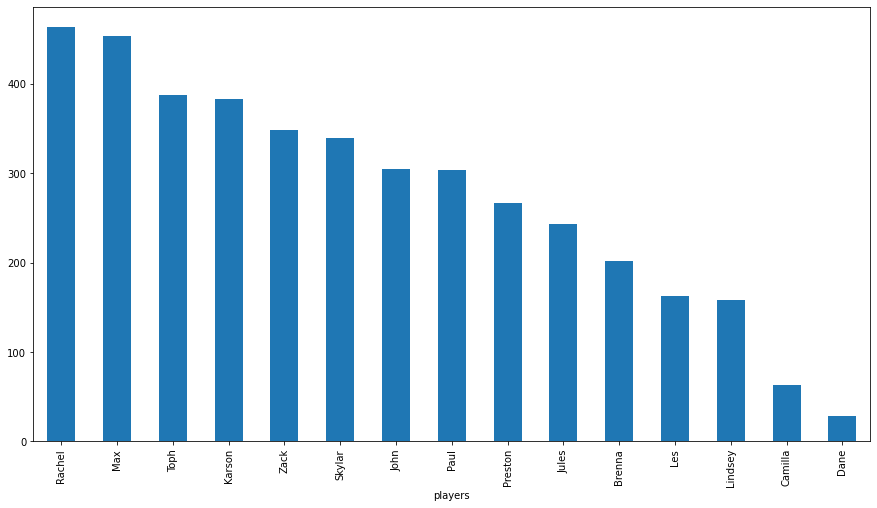

In [63]:
ranking = player_games_df.groupby('players')['score'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15, 8))

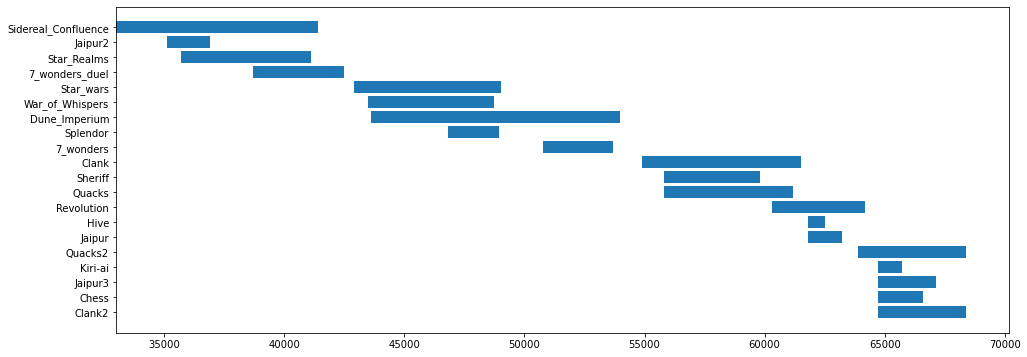

In [64]:
fig, ax = plt.subplots(1, figsize=(16,6))
gantt = games_df.sort_values(by='game_start', ascending=False)
ax.barh(gantt['game_played'], (gantt['game_end']-gantt['game_start']).dt.total_seconds(),left=gantt['game_start'].dt.hour*60*60+gantt['game_start'].dt.minute*60)
plt.show()

In [176]:
len(y-model.predict(x.reshape(-1,1)))

18

In [177]:
x = player_games_df.groupby('players')[['game_length_minutes','score']].sum().sort_values(by='score', ascending=False).values[:,0]
y = player_games_df.groupby('players')[['game_length_minutes','score']].sum().sort_values(by='score', ascending=False).values[:,1]
model = lr()
model.fit(x.reshape(-1,1),y)
pd.DataFrame(np.arange(0,18),y-model.predict(x.reshape(-1,1)))

,0
37.804233,0
35.935908,1
-20.822103,2
-8.998254,3
40.428813,4
17.099625,5
0.462609,6
-49.119249,7
-18.197522,8
-15.604983,9


<AxesSubplot:xlabel='0', ylabel='1'>

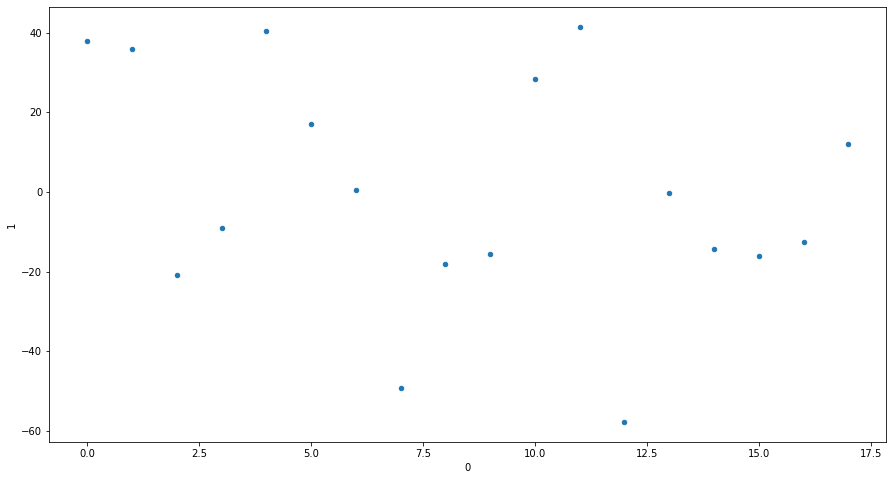

In [178]:
pd.DataFrame((np.arange(0,18),y-model.predict(x.reshape(-1,1)))).T.plot(kind='scatter',x=0, y=1, figsize=(15,8))

In [179]:
import scipy.stats as st
rng = np.random.default_rng()
st.kstest(y-model.predict(x.reshape(-1,1)),
             st.norm.cdf)

KstestResult(statistic=0.5, pvalue=0.00010984615735311917)

(array([2., 0., 0., 2., 5., 2., 0., 2., 1., 4.]),
 array([-57.78113443, -47.85604283, -37.93095124, -28.00585964,
        -18.08076805,  -8.15567645,   1.76941514,  11.69450674,
         21.61959833,  31.54468993,  41.46978152]),
 <BarContainer object of 10 artists>)

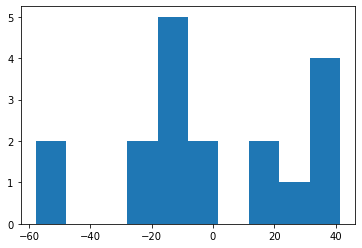

In [180]:
plt.hist(y-model.predict(x.reshape(-1,1)))

In [181]:
x = player_games_df.groupby('players')[['game_length_minutes','score']].sum().sort_values(by='score', ascending=False).values[:,0]

In [5]:
game = ('Dune Imperium', ('Les', 'Zack', 'Paul', 'Skylar'), '2022/12/1 13:00:00', '2022/12/1 15:25:00')
game_uuid = str(uuid.uuid4())
game_list = [(game_uuid, game[0], place, player, game[2], game[3]) for place, player in enumerate(game[1])]

In [6]:
pd.DataFrame(game_list, columns=['game_id', 'game_played', 'player', 'place_order', 'game_start', 'game_end'])

,game_id,game_played,player,place_order,game_start,game_end
0,015cc072-417b-463f-b12f-b4147f3f02d4,Dune Imperium,0,Les,2022/12/1 13:00:00,2022/12/1 15:25:00
1,015cc072-417b-463f-b12f-b4147f3f02d4,Dune Imperium,1,Zack,2022/12/1 13:00:00,2022/12/1 15:25:00
2,015cc072-417b-463f-b12f-b4147f3f02d4,Dune Imperium,2,Paul,2022/12/1 13:00:00,2022/12/1 15:25:00
3,015cc072-417b-463f-b12f-b4147f3f02d4,Dune Imperium,3,Skylar,2022/12/1 13:00:00,2022/12/1 15:25:00


In [7]:
con = sql.connect("tutorial.db")

In [8]:
cur = con.cursor()

In [9]:
cur.execute("CREATE TABLE game_reports(game_id, game_played, player, place_order, game_start, game_end)")

OperationalError: table game_reports already exists

In [10]:
res = cur.execute("select * from sqlite_master")

In [11]:
res.fetchall()

[('table',
  'game_reports',
  'game_reports',
  3,
  'CREATE TABLE game_reports(game_id, game_played, player, place_order, game_start, game_end)')]

In [43]:
game1 = pd.DataFrame(game_list, columns=['game_id', 'game_played', 'player', 'place_order', 'game_start', 'game_end'])

In [52]:
game1.to_sql('game_reports', con, if_exists='append', index=False, method='multi')

4

In [53]:
res = cur.execute("select * from game_reports")
res.fetchall()

[('e17eb5f1-f941-455a-b21a-7a9fb06fce81',
  'Dune Imperium',
  0,
  'Les',
  '2022/12/1 13:00:00',
  '2022/12/1 15:25:00'),
 ('e17eb5f1-f941-455a-b21a-7a9fb06fce81',
  'Dune Imperium',
  1,
  'Zack',
  '2022/12/1 13:00:00',
  '2022/12/1 15:25:00'),
 ('e17eb5f1-f941-455a-b21a-7a9fb06fce81',
  'Dune Imperium',
  2,
  'Paul',
  '2022/12/1 13:00:00',
  '2022/12/1 15:25:00'),
 ('e17eb5f1-f941-455a-b21a-7a9fb06fce81',
  'Dune Imperium',
  3,
  'Skylar',
  '2022/12/1 13:00:00',
  '2022/12/1 15:25:00')]

In [23]:
pd.set_option('display.max_rows', 1000)